# My Jupyter Notebook on IBM Data Science Experience

**My name              : Reza Dwi Utomo**  
My desired occupation  : Data Scientist

_Big data changes human's life drastically. Based on that, Data Science, a field of processing such big data to unveil hidden insights, tremendously develops. Many approaches are applied to enhance its performance. I love to use intelligent method to uncover new knowledge from data. Currently, I am striving to upgrade my skills and knowledge to reach my career goal._

## Table of Contents 
This notebook is organized as follows. You could click on each section if you'd like to jump to it directly.

1. [London Underground Average Monthly Temperatures](#London-Underground-Average-Monthly-Temperatures)

2. [London Underground Map](#London-Underground-Map)

3. [A Brief about the Data](#A-Brief-about-the-Data)

4. [Coding](#Coding)

5. [Conclusions](#Conclusions)

### London Underground Average Monthly Temperatures<a id="1"></a>
I'd like to plot monthly temperature from London Underground (LU) lines.

**If you'd like to read the data set, you could read it [here](https://data.london.gov.uk/dataset/london-underground-average-monthly-temperatures) or I've cropped its description below:**

London Underground records temperatures across the Underground in order to inform our cooling initiatives.

Platform temperatures on the deep Tube are routinely monitored using data loggers. Average monthly evening peak temperatures since 2013 are provided on this page.

We are investing millions as part of a long-term programme to ensure we can deliver more services, and continue to introduce new trains to meet growing customer numbers whilst providing more comfortable journeys. We have implemented energy efficient solutions on new trains, which saves energy and reduces the heat generated. We have also removed heat from our station and tunnel environment by installing new ventilation or cooling solutions.

On the Central line we have installed solar reflective material on the external surface of train roofs and solar reducing films on windows to minimise solar gains into the carriages.

On the Victoria line we have doubled the capacity of thirteen ventilation shafts, which provide more air flow, as well as introduced regenerative braking (which returns power to the rails while the train is braking) on the new trains. We have also installed air cooling units and mechanical chillers at some key busy stations, such as Oxford Circus, and have been using groundwater underneath Victoria Tube station to provide cooling to the platforms. We are similarly using water from the aquifer underneath Green Park to provide cooling for that Tube station. In addition, we have upgraded existing ventilation fans and installed new fans at a number of stations across the network.

As part of this work to make customer journeys more comfortable, we are also working to reduce temperatures inside carriages. 192 new air-conditioned trains are now in operation on the Circle, District, Hammersmith & City and Metropolitan lines.

Note: Sub-surface lines are the Circle, Hammersmith & City, District and Metropolitan lines.

### A brief about the data<a id="3"></a>
The data consist of 8 lines as follows:
- Bakerloo
- Central
- Jubilee
- Northern
- Piccadilly
- Victoria
- Waterloo_and_City
- Sub-surface_lines (Circle, Hammersmith & City, District and Metropolitan)

You could see those 8 lines in the [map](#2) below.

### London Underground Map<a id="2"></a>
For your information, you could see the map of LU lines below.

![](https://tfl.gov.uk/cdn/static/cms/images/tube-map.gif)

### Coding<a id="4"></a>
Alright. In this section, let's process the data to gain the insight.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set style for plot - I prefer to use 'ggplot' style
plt.style.use('ggplot')

# import the file. In this case, I import the file drom London Open Data website. I use data of LU temperature from 2013 to 2018.
file = 'https://data.london.gov.uk/download/london-underground-average-monthly-temperatures/b01c7853-fff2-4781-9755-9b5e1404d78c/lu-average-monthly-temperatures.csv'
df = pd.read_csv(file)
# Let's show the DataFrame info
df.info(); print('\n')
# Let's show its data types
print(df.dtypes); print('\n')
# Let's show its 5 first rows to recognize the data
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               67 non-null     int64  
 1   Month              67 non-null     object 
 2   Bakerloo           64 non-null     float64
 3   Central            65 non-null     float64
 4   Jubilee            65 non-null     float64
 5   Northern           65 non-null     float64
 6   Piccadilly         64 non-null     float64
 7   Victoria           67 non-null     float64
 8   Waterloo_and_City  65 non-null     float64
 9   Sub-surface_lines  65 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 5.4+ KB


Year                   int64
Month                 object
Bakerloo             float64
Central              float64
Jubilee              float64
Northern             float64
Piccadilly           float64
Victoria             float64
Waterloo_and_City    floa

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
0,2013,January,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9
1,2013,February,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3
2,2013,March,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4
3,2013,April,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3
4,2013,May,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3


By showing its 5 first data, we can see that there are 8 lines of LU available, i.e. Bakerloo, Central, Jubilee, and so on. The Year and Month columns indicate time. I'd like to assign both as indices just like table below:

Date | Bakerloo | Central | Jubilee | Northern | Piccadilly | Victoria | Waterloo_and_City | Sub-surface_lines
--- | --- | --- | --- | --- | --- | --- | --- | ---
2013-01-01 | ... | ... | ... | ... | ... | ... | ... | ...
2013-02-01 | ... | ... | ... | ... | ... | ... | ... | ...
2013-03-01 | ... | ... | ... | ... | ... | ... | ... | ...
 ... | ... | ... | ... | ... | ... | ... | ... | ...

In order to do that, follow below steps:

In [3]:
# Since the Month column is in string data type, I need to change it to integer type.
# To do this, first I define a dictionary called MonthInt to map the conversion
MonthInt = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# Then by using MonthInt, let's convert the month to integer type
df.Month = df.Month.map(MonthInt)

# Then combine both Year and Month columns to a new column called Date. Don't forget to assign the day.
# Since the data don't have any day column, simply we just assign the day as 1.
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# Okey. We've got the Date column, so we don't need Year and Month columns any longer. Just drop both.
df = df.drop(columns=['Year','Month'])

# Using Date column, set the index of DataFrame
df = df.set_index('Date')

# Let's see the data again
df.head()

,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub-surface_lines
Date,,,,,,,,
2013-01-01,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9
2013-02-01,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3
2013-03-01,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4
2013-04-01,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3
2013-05-01,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3


Cool! We've got what we need. The DataFrame is now cleaned. We're going to plot it now. Follow the steps below:

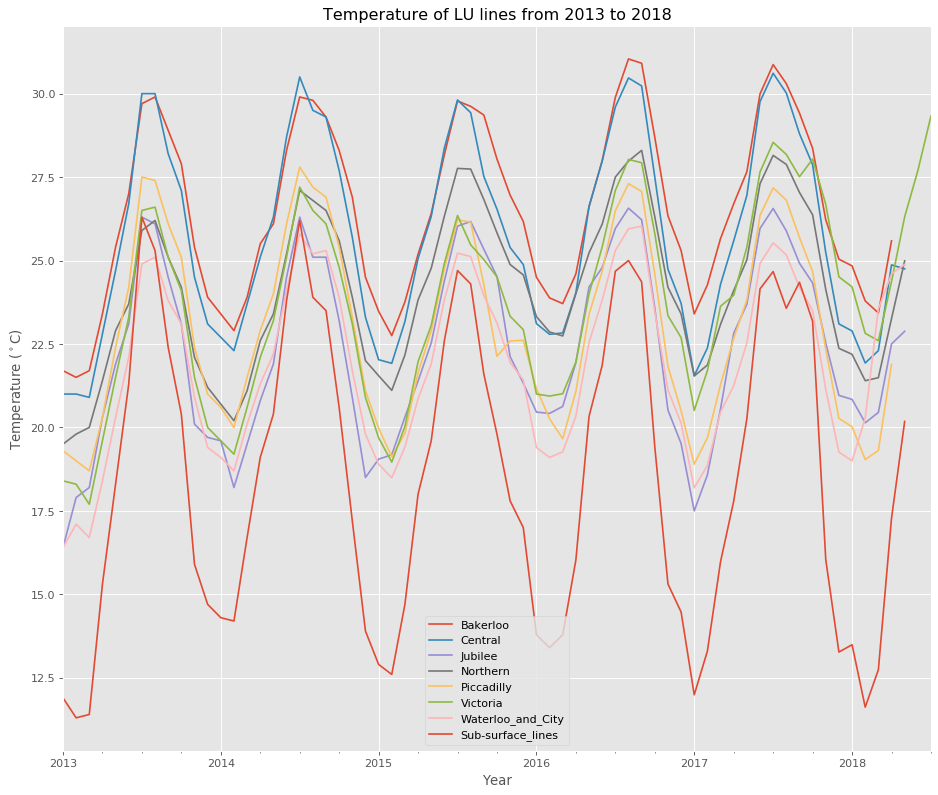

In [4]:
# As I'd like to have wider plot, I need to set the plot size in advance
figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')

# Just plot all LU lines. As we'd like to make a line plot, we need to use kind='line'
df.Bakerloo.plot(kind='line')
df.Central.plot(kind='line')
df.Jubilee.plot(kind='line')
df.Northern.plot(kind='line')
df.Piccadilly.plot(kind='line')
df.Victoria.plot(kind='line')
df.Waterloo_and_City.plot(kind='line')
df['Sub-surface_lines'].plot(kind='line')

# Set the decoration
plt.legend(loc='lower center')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperature of LU lines from 2013 to 2018')

# And show the plot
plt.show()

### Conclusions<a id="5"></a>
We have shown the plot of LU lines temperature. We can see from the figure above that the temperature is fluctuative every year, and this occurs equally for each line.  
For next EDA (Exploratory Data Analysis) about this data, I'd like to gain insight regarding whether there is correlation between the temperature of LU lines and the number of those passengers.  

_I really appreciate you spending time to read this simple notebook._